In [1]:
""" load them libs """
import matplotlib.pyplot as plt
import networkx as nx
import random
import math
import pandas as pd
import statsmodels.api as sm
import glob
import os
import numpy as np
from PIL import Image
from helpers import *
import pickle
import time
import matplotlib.patches as mpatches
#random.seed(100)
#tic = time.time()

/home/lucaskruitwagen/miniconda3/envs/py2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
""" get all files """
files = glob.glob('./matrix_csvs/*')

all_files = sorted([f for f in files if (f.split('/')[-1].split('_')[-1]=='influence.csv')])

print all_files

['./matrix_csvs/2004.75_por_green_influence.csv', './matrix_csvs/2007.75_por_green_influence.csv', './matrix_csvs/2008.75_por_green_influence.csv', './matrix_csvs/2009.75_por_green_influence.csv', './matrix_csvs/2010.75_por_green_influence.csv', './matrix_csvs/2011.5_por_green_influence.csv', './matrix_csvs/2012.75_por_green_influence.csv', './matrix_csvs/2013.75_por_green_influence.csv', './matrix_csvs/2014.75_por_green_influence.csv', './matrix_csvs/2015.0_por_green_influence.csv', './matrix_csvs/2015.25_por_green_influence.csv', './matrix_csvs/2015.5_por_green_influence.csv', './matrix_csvs/2015.75_por_green_influence.csv', './matrix_csvs/2016.0_por_green_influence.csv', './matrix_csvs/2016.25_por_green_influence.csv', './matrix_csvs/2016.5_por_green_influence.csv', './matrix_csvs/2016.75_por_green_influence.csv', './matrix_csvs/2017.0_por_green_influence.csv', './matrix_csvs/2017.25_por_green_influence.csv', './matrix_csvs/2017.5_por_green_influence.csv', './matrix_csvs/2017.75_por

In [3]:
""" get a dict going with files and data """
data = {}
years = range(2007,2018)
years_m = [2007,2008,2009,2010,2012,2013,2014,2015,2016,2017]
for y in years_m:
    fname_all = [f for f in all_files if ((str(y)+'.75') in f)][0]
    data[y]={'year':y,
             'fname_all':fname_all,
             'data_all':0.0}

    #2011 notes
data[2011]={'year': 2011,
            'fname_all': './matrix_csvs/2011.5_por_green_influence.csv',
            'data_all': 0.0}
    
for y in years:
    print data[y]


{'fname_all': './matrix_csvs/2007.75_por_green_influence.csv', 'data_all': 0.0, 'year': 2007}
{'fname_all': './matrix_csvs/2008.75_por_green_influence.csv', 'data_all': 0.0, 'year': 2008}
{'fname_all': './matrix_csvs/2009.75_por_green_influence.csv', 'data_all': 0.0, 'year': 2009}
{'fname_all': './matrix_csvs/2010.75_por_green_influence.csv', 'data_all': 0.0, 'year': 2010}
{'fname_all': './matrix_csvs/2011.5_por_green_influence.csv', 'data_all': 0.0, 'year': 2011}
{'fname_all': './matrix_csvs/2012.75_por_green_influence.csv', 'data_all': 0.0, 'year': 2012}
{'fname_all': './matrix_csvs/2013.75_por_green_influence.csv', 'data_all': 0.0, 'year': 2013}
{'fname_all': './matrix_csvs/2014.75_por_green_influence.csv', 'data_all': 0.0, 'year': 2014}
{'fname_all': './matrix_csvs/2015.75_por_green_influence.csv', 'data_all': 0.0, 'year': 2015}
{'fname_all': './matrix_csvs/2016.75_por_green_influence.csv', 'data_all': 0.0, 'year': 2016}
{'fname_all': './matrix_csvs/2017.75_por_green_influence.csv'

In [4]:
for y in years:
    print y
    data[y]['data_all']=pd.read_csv(data[y]['fname_all'], encoding='utf-8')
    print data[y]['data_all'].shape
    print list(data[y]['data_all'])

2007
(219, 223)
['Unnamed: 0', u'POR_GREEN', u'INFLUENCE', u'AD', u'AE', u'AF', u'AG', u'AI', u'AL', u'AM', u'AN', u'AO', u'AQ', u'AR', u'AS', u'AT', u'AU', u'AW', u'AZ', u'BA', u'BB', u'BD', u'BE', u'BF', u'BG', u'BH', u'BI', u'BJ', u'BM', u'BN', u'BO', u'BR', u'BS', u'BT', u'BW', u'BY', u'BZ', u'CA', u'CF', u'CG', u'CH', u'CI', u'CK', u'CL', u'CM', u'CN', u'CO', u'CR', u'CU', u'CV', u'CY', u'CZ', u'DE', u'DJ', u'DK', u'DM', u'DO', u'DZ', u'EC', u'EE', u'EG', u'EH', u'ER', u'ES', u'ET', u'FI', u'FJ', u'FK', u'FM', u'FO', u'FR', u'GA', u'GB', u'GD', u'GE', u'GF', u'GH', u'GI', u'GL', u'GM', u'GN', u'GP', u'GQ', u'GR', u'GT', u'GU', u'GW', u'GY', u'HN', u'HR', u'HT', u'HU', u'ID', u'IE', u'IL', u'IM', u'IN', u'IQ', u'IR', u'IS', u'IT', u'JM', u'JO', u'JP', u'KE', u'KG', u'KH', u'KI', u'KM', u'KN', u'KP', u'KR', u'KW', u'KY', u'KZ', u'LA', u'LB', u'LC', u'LI', u'LK', u'LR', u'LS', u'LT', u'LU', u'LV', u'LY', u'MA', u'MC', u'MD', u'ME', u'MG', u'MH', u'MK', u'ML', u'MM', u'MN', u'MP', u'M

In [5]:
""" fill out extra columns """

all_indices = []

for y in years:
    all_indices += list(data[y]['data_all'])
    
print set(all_indices)

for y in years:
    new_cols = [v for v in set(all_indices) if v not in data[y]['data_all']]
    for v in new_cols:
        data[y]['data_all'][v]=0
        

set([u'BD', u'BE', u'BF', u'BG', u'BA', u'BB', u'WF', u'BM', u'BN', u'BO', u'BH', u'BI', u'BJ', u'BT', u'JM', u'BW', u'WS', u'BQ', u'BR', u'BS', u'BY', u'BZ', u'RU', u'RW', 'Unnamed: 0', u'RS', u'INFLUENCE', u'TL', u'RE', u'TM', u'TJ', u'RO', u'TK', u'GW', u'GU', u'GT', u'GS', u'GR', u'GQ', u'GP', u'JP', u'GY', u'GF', u'GE', u'GD', u'GB', u'GA', u'SV', u'GN', u'GM', u'GL', u'GI', u'GH', u'OM', u'TN', u'JO', u'HR', u'HT', u'HU', u'HN', u'VE', u'PS', u'PW', u'PT', u'PY', u'IQ', u'PA', u'PF', u'PG', u'PE', u'PK', u'PH', u'PL', u'PM', u'ZM', u'EH', u'EE', u'EG', u'ZA', u'EC', u'IT', u'VN', u'SB', u'ET', u'ZW', u'SA', u'ES', u'ER', u'ME', u'MD', u'MG', u'MF', u'MA', u'MC', u'UZ', u'MM', u'ML', u'MN', u'MH', u'MK', u'MU', u'MT', u'MW', u'MV', u'MQ', u'MP', u'MS', u'MR', u'IM', u'UG', u'MY', u'MX', u'IL', u'FR', u'SH', u'FI', u'FJ', u'FK', u'FM', u'FO', u'NI', u'NL', u'NO', u'SO', u'VU', u'NC', u'NE', u'NG', u'NZ', u'NP', u'NR', u'NU', u'CK', u'XK', u'CI', u'CH', u'CO', u'CN', u'CM', u'CL', u

In [6]:
""" add INFLUENCE_t-1"""

for y in years[1:]:
    data[y]['data_all'] = data[y]['data_all'].merge(data[y-1]['data_all'][['INFLUENCE']], left_index=True, right_index=True, how='left', suffixes=('','_t-1'))
    data[y]['data_all']['INFLUENCE_t-1'] = data[y]['data_all']['INFLUENCE_t-1'].fillna(0.0)
    
print data[2017]['data_all']

    Unnamed: 0  POR_GREEN  INFLUENCE  AD  AE  AF  AG  AI  AL  AM  \
0           UA   0.013571   0.000072   0   0   0   0   0   0   0   
1           CZ   0.066208   0.001055   0   0   0   0   0   0   0   
2           HR   0.154703   0.006881   0   0   0   0   0   0   0   
3           BG   0.104660   0.008198   0   0   0   0   0   0   0   
4           CU   0.043179   0.000861   0   0   0   0   0   0   0   
5           AU   0.122233   0.002450   0   0   0   0   0   0   0   
6           AR   0.112371   0.000722   0   0   0   0   0   0   0   
7           BR   0.147877   0.000622   0   0   0   0   0   0   0   
8           SV   0.281331   0.000000   0   0   0   0   0   0   0   
9           TH   0.246493   0.000369   0   0   0   0   0   0   0   
10          SY   0.104090   0.000000   0   0   0   0   0   0   0   
11          IN   0.106307   0.000187   0   0   0   0   0   0   0   
12          GB   0.317987   0.009776   0   0   0   0   0   0   0   
13          MX   0.191988   0.004288   0   0   0

In [7]:
""" concat whole list """

df = pd.concat([data[y]['data_all'] for y in years[1:]], axis=0)
df.DATE = df.DATE-2007

print df

print df.shape

     AD  AE  AF  AG  AI  AL  AM  AN  AO  AQ ...  VN  VU  WF  WS  XK  YE  YT  \
0     0   0   0   0   0   0   0   0   0   0 ...   0   0   0   0   0   0   0   
1     0   0   0   0   0   0   0   0   0   0 ...   0   0   0   0   0   0   0   
2     0   0   0   0   0   0   0   0   0   0 ...   0   0   0   0   0   0   0   
3     0   0   0   0   0   0   0   0   0   0 ...   0   0   0   0   0   0   0   
4     0   0   0   0   0   0   0   0   0   0 ...   0   0   0   0   0   0   0   
5     0   0   0   0   0   0   0   0   0   0 ...   0   0   0   0   0   0   0   
6     0   0   0   0   0   0   0   0   0   0 ...   0   0   0   0   0   0   0   
7     0   0   0   0   0   0   0   0   0   0 ...   0   0   0   0   0   0   0   
8     0   0   0   0   0   0   0   0   0   0 ...   0   0   0   0   0   0   0   
9     0   0   0   0   0   0   0   0   0   0 ...   0   0   0   0   0   0   0   
10    0   0   0   0   0   0   0   0   0   0 ...   0   0   0   0   0   0   0   
11    0   0   0   0   0   0   0   0   0   0 ...   0 

In [8]:
"""reverse the one-hot"""

country_cols = [c for c in df.columns if len(c)<3]
print country_cols

def get_country(row):
    for c in country_cols:
        if row[c]==1:
            return c

df['COUNTRY']  = df.apply(get_country, axis=1)
print df['COUNTRY']

[u'AD', u'AE', u'AF', u'AG', u'AI', u'AL', u'AM', u'AN', u'AO', u'AQ', u'AR', u'AS', u'AT', u'AU', u'AW', u'AZ', u'BA', u'BB', u'BD', u'BE', u'BF', u'BG', u'BH', u'BI', u'BJ', u'BM', u'BN', u'BO', u'BQ', u'BR', u'BS', u'BT', u'BW', u'BY', u'BZ', u'CA', u'CD', u'CF', u'CG', u'CH', u'CI', u'CK', u'CL', u'CM', u'CN', u'CO', u'CR', u'CU', u'CV', u'CY', u'CZ', u'DE', u'DJ', u'DK', u'DM', u'DO', u'DZ', u'EC', u'EE', u'EG', u'EH', u'ER', u'ES', u'ET', u'FI', u'FJ', u'FK', u'FM', u'FO', u'FR', u'GA', u'GB', u'GD', u'GE', u'GF', u'GH', u'GI', u'GL', u'GM', u'GN', u'GP', u'GQ', u'GR', u'GS', u'GT', u'GU', u'GW', u'GY', u'HN', u'HR', u'HT', u'HU', u'ID', u'IE', u'IL', u'IM', u'IN', u'IQ', u'IR', u'IS', u'IT', u'JM', u'JO', u'JP', u'KE', u'KG', u'KH', u'KI', u'KM', u'KN', u'KP', u'KR', u'KW', u'KY', u'KZ', u'LA', u'LB', u'LC', u'LI', u'LK', u'LR', u'LS', u'LT', u'LU', u'LV', u'LY', u'MA', u'MC', u'MD', u'ME', u'MF', u'MG', u'MH', u'MK', u'ML', u'MM', u'MN', u'MP', u'MQ', u'MR', u'MS', u'MT', u'MU'

In [9]:
"""get the policies df"""

df_policy = pd.read_csv('policy_df.csv', encoding='utf-8')
print df_policy

harmon_dict = {
        'SALES & OTHER TAX CREDITS': 'SALES_TAX_CREDIT', 
        'BIOFUELS MANDATE':'BIOFUEL_TRANSPORT_MANDATE', 
        'RPS':'RPS', 
        'TENDERING':'TENDERING', #== public competitive bidding
        'INVESTMENT & TAX CREDITS':'INVESTMENT_TAX_CREDIT', 
        'TRADEABLE RECS':'TRADEABLE_RECS', 
        'FIT':'FIT', 
        'PUBLIC INVESTMENT/FINANCE/GRANTS':'PUBLIC_INVESTMENT', 
        'ENERGY PRODUCTION PAYMENTS':'ENERGY_PRODUCTION_PAYMENTS', 
        'PUBLIC INVESTMENT/FINANCE/GRANTS/SUBSIDIES':'PUBLIC_INVESTMENT', #2017 only - grants, capital subsidies merged with public investment/finance
        'RENEWABLE ENERGY TARGET':'RENEWABLE_ENERGY_TARGET', 
        'RENEWABLE ENERGY NDC':'RE_IN_NDC',
        'TRANSPORT / BIOFUELS MANDATE':'BIOFUEL_TRANSPORT_MANDATE', 
        'PUBLIC INVESTMENT/FINANCE':'PUBLIC_INVESTMENT', 
        'CAPITAL SUBSIDY':'SUBSIDIES_GRANTS', 
        'NET METERING':'NET_METERING', 
        'GRANTS':'SUBSIDIES_GRANTS', #= capital subsidy
        'HEAT MANDATE':'HEAT_MANDATE', 
        'PUBLIC COMPETITIVE BIDDING':'TENDERING', #public tendering 
        'TRADEABLE REC':'TRADEABLE_RECS'
        }

policies = list(set([v for k,v, in harmon_dict.items()]))
print policies

df_new = df.drop(country_cols, axis=1)
df_new['DATE']=(df_new['DATE']+2006).astype(int)
print df_new

dfs = []

for y in df_new['DATE'].unique():
    
    if (y ==2008) or (y==2009):
        cols_y = [(str(2007)+'_'+p) for p in policies]
    else:
        cols_y = [(str(y)+'_'+p) for p in policies]
    #print cols_y
    cols_y = [c for c in cols_y if c in list(df_policy)]
    
    #drop date prefixes
    new_cols = ['_'.join(c.split('_')[1:]) for c in cols_y]
    #print new_cols
    
    rename_dict = dict(zip(cols_y,new_cols))
    
    print rename_dict
    
    
    
    cols_y.append('iso2')
    print 'cols_y', cols_y
    df_slice = df_policy[cols_y]
    df_slice['DATE']=y
    df_slice = df_slice.rename(index=str, columns=rename_dict)
    dfs.append(df_slice)
    
for d in dfs:
    print list(d)
    
df_final = pd.concat(dfs)

print len(df_final)

     Unnamed: 0  Unnamed: 0.1                                       country  \
0             0             3                                       Algeria   
1             1            14                                       Austria   
2             2            39                                        Canada   
3             3            45                                         China   
4             4            59                                        Cyprus   
5             5            61                                       Denmark   
6             6            65                                       Ecuador   
7             7            70                                       Estonia   
8             8            76                                        France   
9             9            83                                       Germany   
10           10            86                                        Greece   
11           11           100                       

/home/lucaskruitwagen/miniconda3/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


{'2013_PUBLIC_INVESTMENT': 'PUBLIC_INVESTMENT', '2013_RPS': 'RPS', '2013_BIOFUEL_TRANSPORT_MANDATE': 'BIOFUEL_TRANSPORT_MANDATE', '2013_TRADEABLE_RECS': 'TRADEABLE_RECS', '2013_INVESTMENT_TAX_CREDIT': 'INVESTMENT_TAX_CREDIT', '2013_TENDERING': 'TENDERING', '2013_ENERGY_PRODUCTION_PAYMENTS': 'ENERGY_PRODUCTION_PAYMENTS', '2013_SALES_TAX_CREDIT': 'SALES_TAX_CREDIT', '2013_SUBSIDIES_GRANTS': 'SUBSIDIES_GRANTS', '2013_NET_METERING': 'NET_METERING', '2013_HEAT_MANDATE': 'HEAT_MANDATE', '2013_FIT': 'FIT', '2013_RENEWABLE_ENERGY_TARGET': 'RENEWABLE_ENERGY_TARGET'}
cols_y ['2013_INVESTMENT_TAX_CREDIT', '2013_ENERGY_PRODUCTION_PAYMENTS', '2013_FIT', '2013_SALES_TAX_CREDIT', '2013_TENDERING', '2013_RPS', '2013_RENEWABLE_ENERGY_TARGET', '2013_SUBSIDIES_GRANTS', '2013_BIOFUEL_TRANSPORT_MANDATE', '2013_HEAT_MANDATE', '2013_PUBLIC_INVESTMENT', '2013_TRADEABLE_RECS', '2013_NET_METERING', 'iso2']
{'2014_PUBLIC_INVESTMENT': 'PUBLIC_INVESTMENT', '2014_TENDERING': 'TENDERING', '2014_FIT': 'FIT', '2014_SA

In [10]:
"""merge in the new stuff"""

df_new = df_new.merge(df_policy[['iso2', 'PV_MEAN', 'WIND_MEAN']], how='left', left_on='COUNTRY', right_on='iso2')

df_new = df_new.merge(df_final, how='left', left_on=['DATE','COUNTRY'], right_on=['DATE', 'iso2'])


In [11]:
print list(df_new)

[u'DATE', u'INFLUENCE', u'INFLUENCE_t-1', u'POR_GREEN', 'Unnamed: 0', 'COUNTRY', u'iso2_x', u'PV_MEAN', u'WIND_MEAN', 'BIOFUEL_TRANSPORT_MANDATE', 'ENERGY_PRODUCTION_PAYMENTS', 'FIT', 'HEAT_MANDATE', 'INVESTMENT_TAX_CREDIT', 'NET_METERING', 'PUBLIC_INVESTMENT', 'RENEWABLE_ENERGY_TARGET', 'RPS', 'SALES_TAX_CREDIT', 'SUBSIDIES_GRANTS', 'TENDERING', 'TRADEABLE_RECS', u'iso2_y']


In [12]:
""" add some regions just for fun"""
df_regions = pd.read_csv('country_iso_regions.csv', encoding='utf-8')
print df_regions
df_new = df_new.merge(df_regions[['iso2', 'SIPS_REGION']], how='left', left_on='COUNTRY', right_on='iso2')
print df_new

     Unnamed: 0                          country iso2 iso3  iso_num  \
0             0                      Afghanistan   AF  AFG      4.0   
1             1                    Aland Islands   AX  ALA    248.0   
2             2                          Albania   AL  ALB      8.0   
3             3                          Algeria   DZ  DZA     12.0   
4             4                   American Samoa   AS  ASM     16.0   
5             5                          Andorra   AD  AND     20.0   
6             6                           Angola   AO  AGO     24.0   
7             7                         Anguilla   AI  AIA    660.0   
8             8                       Antarctica   AQ  ATA     10.0   
9             9              Antigua and Barbuda   AG  ATG     28.0   
10           10                        Argentina   AR  ARG     32.0   
11           11                          Armenia   AM  ARM     51.0   
12           12                            Aruba   AW  ABW    533.0   
13    

In [13]:
"""one-hot them regions"""
df_new= df_new.join(pd.get_dummies(df_new['SIPS_REGION']))

In [14]:
print list(df_new)
df_new.loc[df_new['US']==1,['OECD_AMX']]=1
df_new.loc[df_new['CN']==1,['OTHERX']]=1
df_new.loc[df_new['IN']==1,['OTHERX']]=1
print df_new.loc[df_new['US']==1]

[u'DATE', u'INFLUENCE', u'INFLUENCE_t-1', u'POR_GREEN', 'Unnamed: 0', 'COUNTRY', u'iso2_x', u'PV_MEAN', u'WIND_MEAN', 'BIOFUEL_TRANSPORT_MANDATE', 'ENERGY_PRODUCTION_PAYMENTS', 'FIT', 'HEAT_MANDATE', 'INVESTMENT_TAX_CREDIT', 'NET_METERING', 'PUBLIC_INVESTMENT', 'RENEWABLE_ENERGY_TARGET', 'RPS', 'SALES_TAX_CREDIT', 'SUBSIDIES_GRANTS', 'TENDERING', 'TRADEABLE_RECS', u'iso2_y', u'iso2', u'SIPS_REGION', u'AFRICA', u'CN', u'IN', u'LAM', u'ME', u'OECD_AMX', u'OECD_EUR', u'OECD_PAC', u'OTHERX', u'TE', u'US']
      DATE  INFLUENCE  INFLUENCE_t-1  POR_GREEN Unnamed: 0 COUNTRY iso2_x  \
4     2007   0.000278       0.000275   0.103043         US      US     US   
225   2008   0.000452       0.000278   0.115594         US      US     US   
446   2009   0.000515       0.000452   0.121024         US      US     US   
668   2010   0.000678       0.000515   0.126071         US      US     US   
891   2011   0.000642       0.000678   0.141820         US      US     US   
1115  2012   0.000654       0.0

In [15]:
""" Bring in these new portions """

new_portions = {}

for y in range(2008,2018):
    new_portions[y] = pd.read_csv('./matrix_csvs/'+str(y)+'_new_portions.csv', encoding='utf-8')
    new_portions[y]['DATE'] = y

df_new_portions = pd.concat([new_portions[y] for y in range(2008,2018)])

for c in list(df_new_portions):
    df_new_portions[c] = df_new_portions[c].replace(np.inf, 1.00)
    df_new_portions[c] = df_new_portions[c].replace([np.nan, -np.inf], 0.00)
#print df_new_portions
df_new_w_portions = df_new.merge(df_new_portions, how='left', left_on=['DATE','COUNTRY'], right_on=['DATE','Unnamed: 0'])

print list(df_new_w_portions)

[u'DATE', u'INFLUENCE', u'INFLUENCE_t-1', u'POR_GREEN', 'Unnamed: 0_x', 'COUNTRY', u'iso2_x', u'PV_MEAN', u'WIND_MEAN', 'BIOFUEL_TRANSPORT_MANDATE', 'ENERGY_PRODUCTION_PAYMENTS', 'FIT', 'HEAT_MANDATE', 'INVESTMENT_TAX_CREDIT', 'NET_METERING', 'PUBLIC_INVESTMENT', 'RENEWABLE_ENERGY_TARGET', 'RPS', 'SALES_TAX_CREDIT', 'SUBSIDIES_GRANTS', 'TENDERING', 'TRADEABLE_RECS', u'iso2_y', u'iso2', u'SIPS_REGION', u'AFRICA', u'CN', u'IN', u'LAM', u'ME', u'OECD_AMX', u'OECD_EUR', u'OECD_PAC', u'OTHERX', u'TE', u'US', 'Unnamed: 0_y', u'yoy_all', u'yoy_green', u'yoy_blue', u'yoy_solar', u'yoy_wind', u'yoy_ff', u'green_ratio', u'blue_ratio', u'solar_ratio', u'wind_ratio', u'ff_ratio']


In [16]:
""" Train an OLS model """

Y = df_new_w_portions.POR_GREEN

drop_list = ['POR_GREEN',
             'INFLUENCE',
             'Unnamed: 0_x',
             'iso2_x',
             'iso2_y',
             'COUNTRY',
             'iso2',
             'CN',
             'IN',
             'US',
             'SIPS_REGION',
             'Unnamed: 0_y',
             'yoy_all',
             'yoy_green',
             'yoy_blue',
             'yoy_solar',
             'yoy_wind',
             'yoy_ff', 
             'green_ratio',
             'blue_ratio',
             'solar_ratio',
             'wind_ratio',
             'ff_ratio']


X = df_new_w_portions.drop(drop_list, axis=1)

print list(X)
#X.to_csv('test_df.csv')

drop_policy =  ['BIOFUEL_TRANSPORT_MANDATE', 
              'ENERGY_PRODUCTION_PAYMENTS',
              'FIT',
              'HEAT_MANDATE',
              'INVESTMENT_TAX_CREDIT',
              'NET_METERING',
              'PUBLIC_INVESTMENT',
              'RENEWABLE_ENERGY_TARGET',
              'RPS',
              'SALES_TAX_CREDIT',
              'SUBSIDIES_GRANTS',
              'TENDERING',
              'TRADEABLE_RECS']

drop_regions = ['AFRICA',
               'LAM',
               'ME',
               'OECD_PAC',
               'OECD_EUR',
               'OECD_AMX',
               'TE',
               'OTHERX']



cols_dict = {}

for l in ['const', 'DATE', 'INFLUENCE_t-1','PV_MEAN','WIND_MEAN']:
    cols_dict[l]="#0061FF"

for l in drop_policy:
    cols_dict[l] = "#00FF90"
    
for l in drop_regions:
    cols_dict[l] = "#FF00F2"
    
for p in ['FIT','NET_METERING','SUBSIDIES_GRANTS']:
    drop_policy.remove(p)

#X = X.drop(drop_policy, axis=1)
#X = X.drop(drop_regions, axis=1)

#print X
#print list(X)
#print X.DATE
X.DATE = (X.DATE - X.DATE.min())/(X.DATE.max()-X.DATE.min())
X['INFLUENCE_t-1'] = (X['INFLUENCE_t-1'] - X['INFLUENCE_t-1'].min())/(X['INFLUENCE_t-1'].max()-X['INFLUENCE_t-1'].min())
#print X['INFLUENCE_t-1']
#X.to_csv('data.csv')
#print X.isnull().any().any()
#print X.DATE
#print X['INFLUENCE_t-1']
#print X.shape


print Y
print list(X.dropna(axis=0, how='any'))
#print list(X)
#print list(Y)
X = sm.add_constant(X)
est = sm.OLS(Y,X, missing='drop')
est = est.fit()
print est.summary()
#print est.summary().as_csv()

#with pd.option_context('display.max_rows', None, 'display.max_columns', 3):
#    print est.params


[u'DATE', u'INFLUENCE_t-1', u'PV_MEAN', u'WIND_MEAN', 'BIOFUEL_TRANSPORT_MANDATE', 'ENERGY_PRODUCTION_PAYMENTS', 'FIT', 'HEAT_MANDATE', 'INVESTMENT_TAX_CREDIT', 'NET_METERING', 'PUBLIC_INVESTMENT', 'RENEWABLE_ENERGY_TARGET', 'RPS', 'SALES_TAX_CREDIT', 'SUBSIDIES_GRANTS', 'TENDERING', 'TRADEABLE_RECS', u'AFRICA', u'LAM', u'ME', u'OECD_AMX', u'OECD_EUR', u'OECD_PAC', u'OTHERX', u'TE']
0       0.000000
1       0.000000
2       0.166237
3       0.021572
4       0.103043
5       0.047077
6       0.035616
7       0.176994
8       0.049666
9       0.050792
10      0.089970
11      0.124170
12      0.198449
13      0.070292
14      0.041360
15      0.150738
16      0.133191
17      0.021836
18      0.154415
19      0.094394
20      0.099401
21      0.213201
22      0.000000
23      0.030839
24      0.018542
25      0.018003
26      0.158005
27      0.000000
28      0.061618
29      0.007460
          ...   
2210    0.192920
2211    0.000562
2212    0.000000
2213    1.000000
2214    0.008779
22

In [17]:
'''This takes the result of an statsmodel results table and transforms it into a dataframe'''
print dir(est)

results_df = pd.DataFrame({"pvals":est.pvalues,
                               "coeff":est.params,
                               "conf_lower":est.conf_int()[0],
                               "conf_higher":est.conf_int()[1],
                               'tvalues':est.tvalues
                                })

#Reordering...
results_df = results_df[["coeff","tvalues","pvals","conf_lower","conf_higher"]]

print results_df

['HC0_se', 'HC1_se', 'HC2_se', 'HC3_se', '_HCCM', '__class__', '__delattr__', '__dict__', '__doc__', '__format__', '__getattribute__', '__hash__', '__init__', '__module__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_cache', '_data_attr', '_get_robustcov_results', '_is_nested', '_wexog_singular_values', 'aic', 'bic', 'bse', 'centered_tss', 'compare_f_test', 'compare_lm_test', 'compare_lr_test', 'condition_number', 'conf_int', 'conf_int_el', 'cov_HC0', 'cov_HC1', 'cov_HC2', 'cov_HC3', 'cov_kwds', 'cov_params', 'cov_type', 'df_model', 'df_resid', 'diagn', 'eigenvals', 'el_test', 'ess', 'f_pvalue', 'f_test', 'fittedvalues', 'fvalue', 'get_influence', 'get_prediction', 'get_robustcov_results', 'initialize', 'k_constant', 'llf', 'load', 'model', 'mse_model', 'mse_resid', 'mse_total', 'nobs', 'normalized_cov_params', 'outlier_test', 'params', 'predict', 'pvalues', 'remove_data', 'resid', 'resid_pearson', '

const                         #0061FF
DATE                          #0061FF
INFLUENCE_t-1                 #0061FF
PV_MEAN                       #0061FF
WIND_MEAN                     #0061FF
BIOFUEL_TRANSPORT_MANDATE     #00FF90
ENERGY_PRODUCTION_PAYMENTS    #00FF90
FIT                           #00FF90
HEAT_MANDATE                  #00FF90
INVESTMENT_TAX_CREDIT         #00FF90
NET_METERING                  #00FF90
PUBLIC_INVESTMENT             #00FF90
RENEWABLE_ENERGY_TARGET       #00FF90
RPS                           #00FF90
SALES_TAX_CREDIT              #00FF90
SUBSIDIES_GRANTS              #00FF90
TENDERING                     #00FF90
TRADEABLE_RECS                #00FF90
AFRICA                        #FF00F2
LAM                           #FF00F2
ME                            #FF00F2
OECD_AMX                      #FF00F2
OECD_EUR                      #FF00F2
OECD_PAC                      #FF00F2
OTHERX                        #FF00F2
TE                            #FF00F2
Name: color,

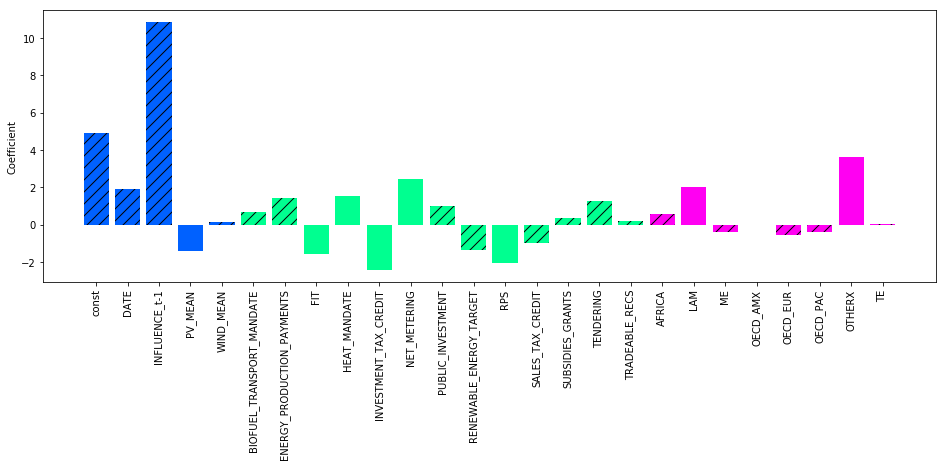

In [101]:
f, axarr = plt.subplots(1, sharex=True, figsize=(16,5))

#axarr.set_yscale('log')

results_df['color'] = pd.Series(cols_dict)
print results_df['color']
results_df['hatch'] = ''
results_df.loc[results_df['pvals']>0.05,['hatch']]='//'

#print list(results_df['hatch'])


bars = axarr.bar(range(len(results_df)),
          results_df.coeff,
          color=results_df['color']
    )

for bar,h in zip(bars,list(results_df['hatch'])):
    bar.set_hatch(h)


axarr.set_xticks(range(0,len(results_df)))
axarr.set_xticklabels(results_df.index.values)
axarr.set_ylabel(r'Coefficient')

for tick in axarr.get_xticklabels():
        tick.set_rotation(90)

#patches = []
#labels=[]
#for k,v in cols_dict.items():
#    labels.append(k)
#    patches.append(mpatches.Patch(color=v))

#f.legend(patches, labels, loc='center', bbox_to_anchor=(0.5,0.93), ncol=len(cols_dict))
f.savefig('./figures/OLS_min.png')

plt.show()